In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.datasets import load_iris

In [5]:
# test euclidean distance
import math
a = np.array([1,2])
b = np.array([2,3])
print(np.linalg.norm(a-b))
print(np.sqrt(np.sum((a-b)**2)))
print(math.sqrt(sum((a-b)**2)))

1.4142135623730951
1.4142135623730951
1.4142135623730951


số centroids:  3
Lần 1:
  Centroid 1: [7.5        3.13636364 6.34545455 2.09090909]
  Centroid 2: [6.275      2.94166667 5.21875    1.92708333]
  Centroid 3: [5.41538462 3.10879121 2.67472527 0.70769231]
Lần 2:
  Centroid 1: [7.38571429 3.13571429 6.22857143 2.08571429]
  Centroid 2: [6.20410959 2.89178082 4.87671233 1.69315068]
  Centroid 3: [5.08253968 3.23174603 1.91269841 0.43015873]
Lần 3:
  Centroid 1: [7.12272727 3.11363636 6.03181818 2.13181818]
  Centroid 2: [6.07432432 2.83108108 4.65945946 1.57567568]
  Centroid 3: [5.00555556 3.34444444 1.5962963  0.3037037 ]
Lần 4:
  Centroid 1: [6.93225806 3.10645161 5.85483871 2.14193548]
  Centroid 2: [5.97352941 2.77058824 4.50147059 1.47205882]
  Centroid 3: [5.00784314 3.40980392 1.49215686 0.2627451 ]
Lần 5:
  Centroid 1: [6.87428571 3.08857143 5.79142857 2.11714286]
  Centroid 2: [5.93230769 2.75538462 4.42923077 1.43846154]
  Centroid 3: [5.006 3.428 1.462 0.246]
Lần 6:
  Centroid 1: [6.85       3.07368421 5.74210526 2.07105263]
 

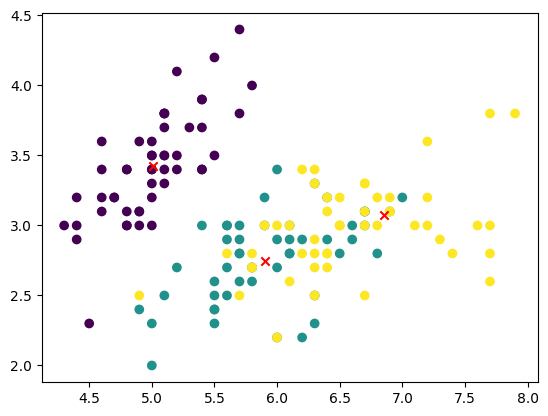

In [6]:
# x là tập dữ liệu iris, c là số lượng centroids
x = load_iris().data
target = load_iris().target
num_centroids = len(set(target))
print("số centroids: ", num_centroids)

# Khởi tạo centroids ngẫu nhiên
centroids = x[np.random.choice(x.shape[0], num_centroids, replace=False)]

def kmeans(x, centroids):
    history = []
    for iteration in range(10):  # Giới hạn số lần lặp vì có thể không hội tụ
        clusters = [[] for _ in range(len(centroids))]
        
        """
        Vòng lặp dưới đây sẽ duyệt qua từng điểm dữ liệu, tính khoảng cách từ điểm đó đến các centroids,
        sau đó gán dữ liệu vào cluster của centroid gần nhất.
        Tham số:
        - x: tập dữ liệu
        - centroids: tập centroids
        - clusters: danh sách các cluster, mỗi cluster là một danh sách chứa các điểm dữ liệu thuộc cluster đó
        - distances: khoảng cách từ mỗi điểm dữ liệu đến các centroids
        """
        for point in x: 
            distances = np.linalg.norm(point - centroids, axis=1)
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # Cập nhật lại centroids
        new_centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])
        
        # Lưu lại lịch sử cập nhật centroids
        history.append(new_centroids)
        
        # Kiểm tra điều kiện dừng với atol là ngưỡng sai số, nếu tất cả các centroids không thay đổi nhiều hơn ngưỡng này thì dừng
        if np.allclose(centroids, new_centroids, atol=0.0001): 
            break      
        centroids = new_centroids 
    return centroids, clusters, history

centroids, clusters, history = kmeans(x, centroids)

for i, centroids in enumerate(history):
    print(f"Lần {i+1}:")
    for j, centroid in enumerate(centroids):
        print(f"  Centroid {j+1}: {centroid}")

# Vẽ biểu đồ
plt.scatter(x[:, 0], x[:, 1], c=target, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()

c:\Users\ADMIN\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids của sklearn:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


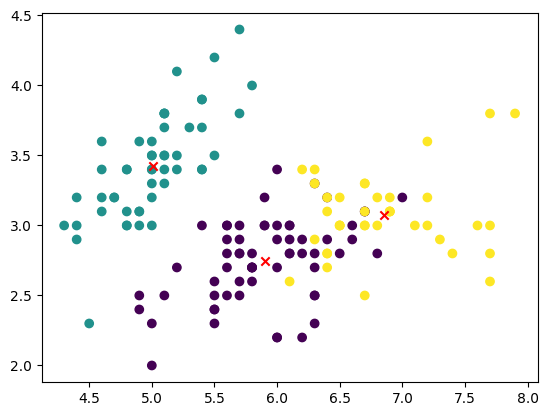

In [7]:
# so sánh vs kmeans của sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_centroids, random_state=0).fit(x)
print("Centroids của sklearn:")
print(kmeans.cluster_centers_)
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.show()

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
penguin_data = pd.read_csv('data/penguins.csv')
penguin_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
print(penguin_data.describe())


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         214.014620  4201.754386
std            5.459584         1.974793         260.558057   801.954536
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.750000  4750.000000
max           59.600000        21.500000        5000.000000  6300.000000


In [11]:
# check missing values
print(penguin_data.isnull().sum())

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [12]:
# drop missing values
penguin_data = penguin_data.dropna()
penguin_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


In [13]:
# check data types
penguin_data.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [14]:
# one-hot encoding
penguin_data = pd.get_dummies(penguin_data)
penguin_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,False,True


In [15]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(penguin_data)
scaled_data = pd.DataFrame(scaled_data, columns=penguin_data.columns)
scaled_data.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,-0.897723,0.777263,-0.126893,-0.572233,-0.054718,-0.985184,0.991085
1,-0.824265,0.117037,-0.107872,-0.509923,-0.054718,1.015038,-1.008996
2,-0.677349,0.421757,-0.073633,-1.195338,-0.054718,1.015038,-1.008996
3,-1.338472,1.081983,-0.081242,-0.946096,-0.054718,1.015038,-1.008996
4,-0.860994,1.742210,-0.092655,-0.696854,-0.054718,-0.985184,0.991085


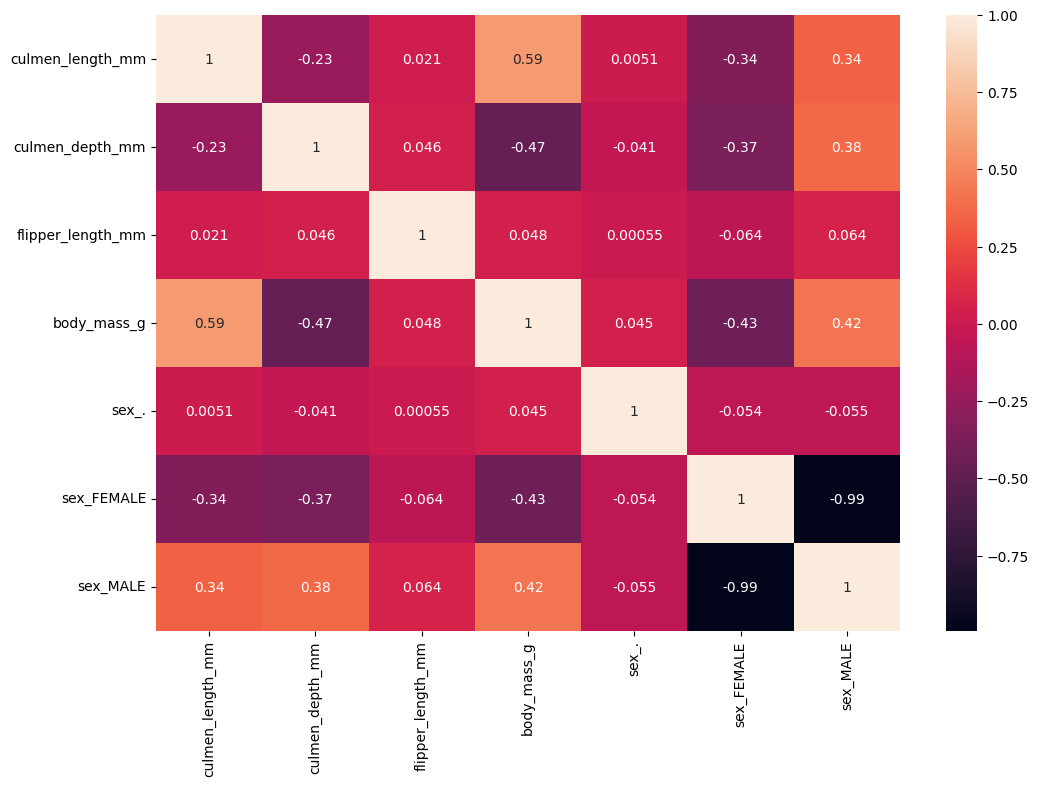

In [16]:
# correlation matrix
corr = scaled_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [17]:
# use PCA to reduce dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,0.606377,1.651713
1,-1.693773,0.138430
2,-1.895954,0.627618
3,-1.988082,1.222709
4,0.657634,2.376558


c:\Users\ADMIN\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 1.11141111  1.33347994]
 [-0.90852947 -1.90584254]
 [ 2.1300906  -1.17028395]
 [-1.85283456  0.41550364]]


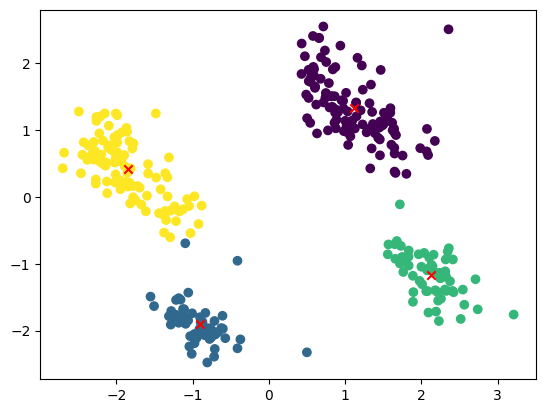

In [18]:
# kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()